In [14]:
# p43 (p64 PDF) 

%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
# provider = IBMQ.load_account()

In [28]:
# p433 (p454 PDF)

# Set the state we wish to search 
N = '011'
num_qubits = len(N)

# Create the quantum circuit 
qc = QuantumCircuit(num_qubits)

# Set all qubits in superposition
qc.h(range(num_qubits))
qc.barrier()

#Draw the circuit
qc.draw()

┌───┐ ░ 
q_0: ┤ H ├─░─
     ├───┤ ░ 
q_1: ┤ H ├─░─
     ├───┤ ░ 
q_2: ┤ H ├─░─
     └───┘ ░

In [29]:
# Create custom cx gate with multiple controls
from qiskit.circuit.library.standard_gates import XGate

multi_cx_gate = XGate().control(num_qubits-1)

In [30]:
# p434 (p455 PDF)

# Reverse the state so it’s in proper qubit ordering
N = N[::-1]

# Encode N into our circuit
for idx in range(num_qubits):
    if N[idx] == '0':
        qc.x(idx)
qc.barrier()

# Draw the circuit
qc.draw()

┌───┐ ░       ░ 
q_0: ┤ H ├─░───────░─
     ├───┤ ░       ░ 
q_1: ┤ H ├─░───────░─
     ├───┤ ░ ┌───┐ ░ 
q_2: ┤ H ├─░─┤ X ├─░─
     └───┘ ░ └───┘ ░

In [31]:
# p434 (p455 PDF)

# Create the Grover oracle for our 3-qubit quantum circuit
qc.h(num_qubits-1)
# qc.ccx(0, 1, 2)
qc.append(multi_cx_gate, range(num_qubits))

qc.h(num_qubits-1)
qc.barrier()

# Draw the circuit
qc.draw()

┌───┐ ░       ░                 ░ 
q_0: ┤ H ├─░───────░────────■────────░─
     ├───┤ ░       ░        │        ░ 
q_1: ┤ H ├─░───────░────────■────────░─
     ├───┤ ░ ┌───┐ ░ ┌───┐┌─┴─┐┌───┐ ░ 
q_2: ┤ H ├─░─┤ X ├─░─┤ H ├┤ X ├┤ H ├─░─
     └───┘ ░ └───┘ ░ └───┘└───┘└───┘ ░

In [32]:
from qiskit.circuit.library.standard_gates import XGate
import inspect

# multi_cx_gate = XGate().control(num_qubits-1)
# qc.append(multi_cx_gate, range(num_qubits))
qc.draw()

┌───┐ ░       ░                 ░ 
q_0: ┤ H ├─░───────░────────■────────░─
     ├───┤ ░       ░        │        ░ 
q_1: ┤ H ├─░───────░────────■────────░─
     ├───┤ ░ ┌───┐ ░ ┌───┐┌─┴─┐┌───┐ ░ 
q_2: ┤ H ├─░─┤ X ├─░─┤ H ├┤ X ├┤ H ├─░─
     └───┘ ░ └───┘ ░ └───┘└───┘└───┘ ░

In [33]:
# p435 (p456 PDF)

# Reset the value after the oracle
for idx in range(num_qubits):
    if N[idx] == '0':
        qc.x(idx)
qc.barrier()

# Draw the circuit
qc.draw()


┌───┐ ░       ░                 ░       ░ 
q_0: ┤ H ├─░───────░────────■────────░───────░─
     ├───┤ ░       ░        │        ░       ░ 
q_1: ┤ H ├─░───────░────────■────────░───────░─
     ├───┤ ░ ┌───┐ ░ ┌───┐┌─┴─┐┌───┐ ░ ┌───┐ ░ 
q_2: ┤ H ├─░─┤ X ├─░─┤ H ├┤ X ├┤ H ├─░─┤ X ├─░─
     └───┘ ░ └───┘ ░ └───┘└───┘└───┘ ░ └───┘ ░

In [34]:
# p436 (p457 PDF)

# Set all qubits in superposition
qc.h(range(num_qubits))
qc.x(range(num_qubits))
qc.barrier()

# Draw the circuit
qc.draw()

┌───┐ ░       ░                 ░       ░ ┌───┐┌───┐ ░ 
q_0: ┤ H ├─░───────░────────■────────░───────░─┤ H ├┤ X ├─░─
     ├───┤ ░       ░        │        ░       ░ ├───┤├───┤ ░ 
q_1: ┤ H ├─░───────░────────■────────░───────░─┤ H ├┤ X ├─░─
     ├───┤ ░ ┌───┐ ░ ┌───┐┌─┴─┐┌───┐ ░ ┌───┐ ░ ├───┤├───┤ ░ 
q_2: ┤ H ├─░─┤ X ├─░─┤ H ├┤ X ├┤ H ├─░─┤ X ├─░─┤ H ├┤ X ├─░─
     └───┘ ░ └───┘ ░ └───┘└───┘└───┘ ░ └───┘ ░ └───┘└───┘ ░

In [35]:
# p436 (p457 PDF)

# Apply another oracle, same as the previous, 
qc.h(num_qubits-1)
# qc.ccx(0, 1, 2)
qc.append(multi_cx_gate, range(num_qubits))
qc.h(num_qubits-1)
qc.barrier()

# Draw the circuit
qc.draw()

┌───┐ ░       ░                 ░       ░ ┌───┐┌───┐ ░                 ░ 
q_0: ┤ H ├─░───────░────────■────────░───────░─┤ H ├┤ X ├─░────────■────────░─
     ├───┤ ░       ░        │        ░       ░ ├───┤├───┤ ░        │        ░ 
q_1: ┤ H ├─░───────░────────■────────░───────░─┤ H ├┤ X ├─░────────■────────░─
     ├───┤ ░ ┌───┐ ░ ┌───┐┌─┴─┐┌───┐ ░ ┌───┐ ░ ├───┤├───┤ ░ ┌───┐┌─┴─┐┌───┐ ░ 
q_2: ┤ H ├─░─┤ X ├─░─┤ H ├┤ X ├┤ H ├─░─┤ X ├─░─┤ H ├┤ X ├─░─┤ H ├┤ X ├┤ H ├─░─
     └───┘ ░ └───┘ ░ └───┘└───┘└───┘ ░ └───┘ ░ └───┘└───┘ ░ └───┘└───┘└───┘ ░

In [36]:
# p437 (p458 PDF)

# Reapply the X rotations on all qubits
qc.x(range(num_qubits))

qc.barrier()

# Reapply Hadamard gates to all qubits
qc.h(range(num_qubits))

# Draw the circuit
qc.draw()

┌───┐ ░       ░                 ░       ░ ┌───┐┌───┐ ░                 ░ »
q_0: ┤ H ├─░───────░────────■────────░───────░─┤ H ├┤ X ├─░────────■────────░─»
     ├───┤ ░       ░        │        ░       ░ ├───┤├───┤ ░        │        ░ »
q_1: ┤ H ├─░───────░────────■────────░───────░─┤ H ├┤ X ├─░────────■────────░─»
     ├───┤ ░ ┌───┐ ░ ┌───┐┌─┴─┐┌───┐ ░ ┌───┐ ░ ├───┤├───┤ ░ ┌───┐┌─┴─┐┌───┐ ░ »
q_2: ┤ H ├─░─┤ X ├─░─┤ H ├┤ X ├┤ H ├─░─┤ X ├─░─┤ H ├┤ X ├─░─┤ H ├┤ X ├┤ H ├─░─»
     └───┘ ░ └───┘ ░ └───┘└───┘└───┘ ░ └───┘ ░ └───┘└───┘ ░ └───┘└───┘└───┘ ░ »
«     ┌───┐ ░ ┌───┐
«q_0: ┤ X ├─░─┤ H ├
«     ├───┤ ░ ├───┤
«q_1: ┤ X ├─░─┤ H ├
«     ├───┤ ░ ├───┤
«q_2: ┤ X ├─░─┤ H ├
«     └───┘ ░ └───┘

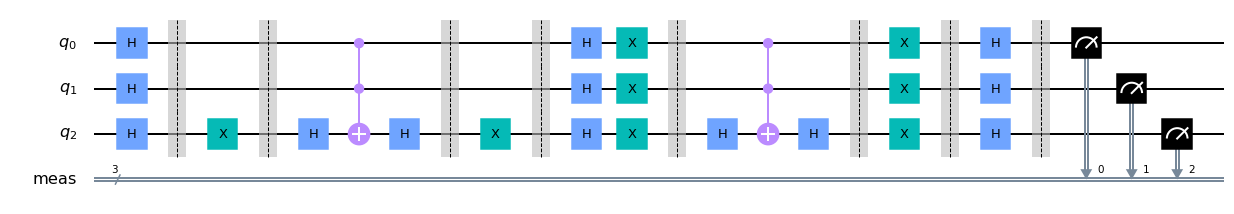

In [37]:
# p437 (p458 PDF)

# Add measurement operators
qc.measure_all()

# Draw the circuit
qc.draw("mpl").savefig("grover.jpg")

# Run on the qasm simulator
backend = Aer.get_backend('qasm_simulator')
# Execute the circuit on the backend
job = execute(qc, backend, shots=1024)

# Extract the results
results = job.result()
counts = results.get_counts(qc)

011: 779
Initial string: 110
Reverse initial string: 011


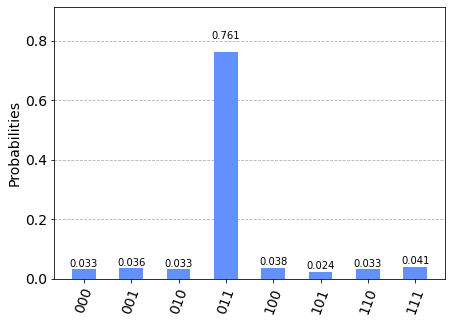

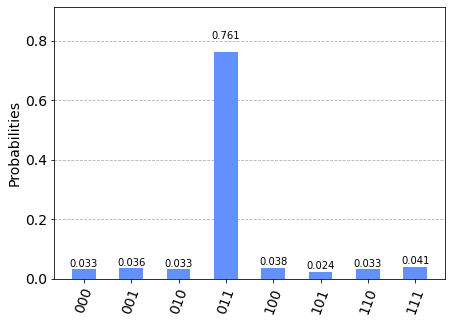

In [38]:
# p438 (p459 PDF)

# Run on the qasm simulator
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit on the backend
job = execute(qc, backend, shots=1024)

# Extract the results
results = job.result()
counts = results.get_counts(qc)

# Print and plot results
# print(max(counts.values()))
print(f"{max(counts, key = counts.get)}: {max(counts.values())}")
print(f"Initial string: {N}")
print(f"Reverse initial string: {N[::-1]}")
plot_histogram(counts)

In [39]:
# p439 (p460 PDF)

# Execute the circuit on the least busy quantum computer
from qiskit.providers.ibmq import least_busy

# backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (num_qubits) and
#                                    not x.configuration().simulator and x.status().operational==True))

backend = provider.get_backend('ibm_brisbane')
print("Set backend: ", backend)

# Launch the job watcher widget
# %qiskit_job_watcher

NameError: name 'provider' is not defined

In [ ]:
# p440 (p461 PDF)

# Execute the circuit on the backend
job = execute(qc, backend, shots=1024)

# Extract the results
results = job.result()
counts = results.get_counts(qc)

# Print and plot results
print(counts)
plot_histogram(counts)

# still contains errors. Tried imb_osaka and ibm_brisbane